# DataVerse Africa Internship Cohort 3.0
# Data Science Track Project 1
Presented By:
### Thato Maelane
### Musonda Musunga

**Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

**Loading the Dataset**

In [5]:
df = pd.read_csv("playground-series-s5e10-publicleaderboard-2025-10-23T20_55_41.csv")

In [6]:
df.head(10)

,Rank,TeamId,TeamName,LastSubmissionDate,Score,SubmissionCount,TeamMemberUserNames
0,1,14465903,Tilii,2025-10-23 08:25:59,0.05537,103,tilii7
1,2,14489038,Meta Models,2025-10-23 10:45:22,0.05537,65,metamodels
2,3,14536047,Kirderf,2025-10-23 11:34:06,0.05538,19,kirderf
3,4,14471526,Chris Deotte,2025-10-23 08:46:51,0.05538,51,cdeotte
4,5,14463918,Alexander,2025-10-23 04:56:24,0.05538,60,kovand1
5,6,14472535,steubk,2025-10-23 17:31:47,0.05538,49,steubk
6,7,14467735,Optimistix,2025-10-23 03:50:16,0.05538,40,optimistix
7,8,14493959,Slavko Prytula,2025-10-22 15:21:40,0.05538,78,slavkoprytula
8,9,14471556,abdelbasset ben kerrouche,2025-10-23 10:04:39,0.05538,50,bassetkerouche
9,10,14463628,Trust your LB!,2025-10-21 11:29:47,0.05538,39,kyr1ll


**Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 2990 non-null   int64  
 1   TeamId               2990 non-null   int64  
 2   TeamName             2990 non-null   object 
 3   LastSubmissionDate   2990 non-null   object 
 4   Score                2990 non-null   float64
 5   SubmissionCount      2990 non-null   int64  
 6   TeamMemberUserNames  2989 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 163.6+ KB


**Summary Stats**

In [8]:
df.describe()

,Rank,TeamId,Score,SubmissionCount
count,2990.000000,2.990000e+03,2990.000000,2990.000000
mean,1494.500000,1.450643e+07,40.583927,6.586288
std,863.282978,3.742714e+04,2214.443095,10.034721
min,0.000000,1.446153e+07,0.055370,1.000000
25%,747.250000,1.447195e+07,0.055570,1.000000
50%,1494.500000,1.449765e+07,0.055650,4.000000
75%,2241.750000,1.453743e+07,0.056040,7.000000
max,2989.000000,1.458807e+07,121087.802910,112.000000


**Checking for duplicates**

In [9]:
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [10]:
df.isnull().sum()

Rank                   0
TeamId                 0
TeamName               0
LastSubmissionDate     0
Score                  0
SubmissionCount        0
TeamMemberUserNames    1
dtype: int64

**Dropping the missing Values**

In [11]:
df.dropna(inplace=True)


In [12]:
df.isnull().sum()

Rank                   0
TeamId                 0
TeamName               0
LastSubmissionDate     0
Score                  0
SubmissionCount        0
TeamMemberUserNames    0
dtype: int64

**Data Information**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2989 entries, 0 to 2989
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 2989 non-null   int64  
 1   TeamId               2989 non-null   int64  
 2   TeamName             2989 non-null   object 
 3   LastSubmissionDate   2989 non-null   object 
 4   Score                2989 non-null   float64
 5   SubmissionCount      2989 non-null   int64  
 6   TeamMemberUserNames  2989 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 186.8+ KB


**Shape of the Dataset**

In [14]:
df.shape

(2989, 7)

**Features on the Dataset**

In [15]:
df.columns

Index(['Rank', 'TeamId', 'TeamName', 'LastSubmissionDate', 'Score',
       'SubmissionCount', 'TeamMemberUserNames'],
      dtype='object')

**Correlation**

In [16]:
corr = df.select_dtypes(include=['number']).corr()
print(corr)

                     Rank    TeamId     Score  SubmissionCount
Rank             1.000000  0.130188  0.031699        -0.412804
TeamId           0.130188  1.000000 -0.020586        -0.233027
Score            0.031699 -0.020586  1.000000        -0.010195
SubmissionCount -0.412804 -0.233027 -0.010195         1.000000


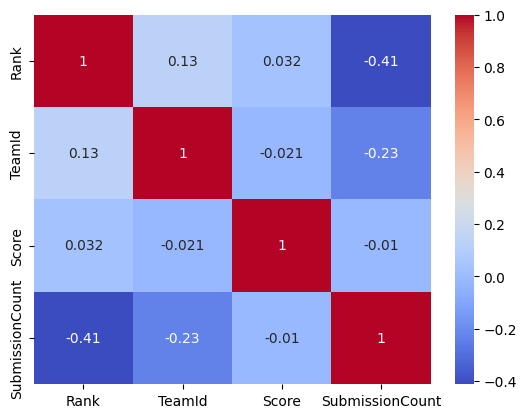

In [17]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Dropping columns that don’t help the model learn patterns**

In [18]:
df = df.drop(['TeamId', 'TeamName', 'TeamMemberUserNames'], axis=1)

In [19]:
df.head(10)

,Rank,LastSubmissionDate,Score,SubmissionCount
0,1,2025-10-23 08:25:59,0.05537,103
1,2,2025-10-23 10:45:22,0.05537,65
2,3,2025-10-23 11:34:06,0.05538,19
3,4,2025-10-23 08:46:51,0.05538,51
4,5,2025-10-23 04:56:24,0.05538,60
5,6,2025-10-23 17:31:47,0.05538,49
6,7,2025-10-23 03:50:16,0.05538,40
7,8,2025-10-22 15:21:40,0.05538,78
8,9,2025-10-23 10:04:39,0.05538,50
9,10,2025-10-21 11:29:47,0.05538,39


**converting the text (string) into a real datetime object that Python can understand and work with mathematically.**

In [20]:
df['LastSubmissionDate'] = pd.to_datetime(df['LastSubmissionDate'])

**Feature Engineering**

In [21]:
df['SubmissionYear'] = df['LastSubmissionDate'].dt.year
df['SubmissionMonth'] = df['LastSubmissionDate'].dt.month
df['SubmissionDay'] = df['LastSubmissionDate'].dt.day
df['SubmissionHour'] = df['LastSubmissionDate'].dt.hour
df['SubmissionWeekday'] = df['LastSubmissionDate'].dt.weekday

In [22]:
# Days since last submission (how recent)
df['DaysSinceLastSubmission'] = (df['LastSubmissionDate'].max() - df['LastSubmissionDate']).dt.days

# Whether they submitted close to the end of the competition
df['IsLastDaySubmission'] = (df['DaysSinceLastSubmission'] == 0).astype(int)


In [23]:
df = df.drop(columns=['LastSubmissionDate'])

***

<span style="color:red">Exploring Possible Relationship between Rank and Other Features</span>

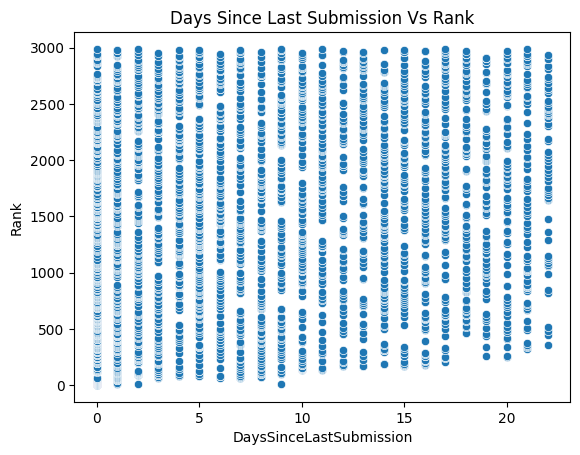

In [24]:
sns.scatterplot(x='DaysSinceLastSubmission', y='Rank', data=df)
plt.title('Days Since Last Submission Vs Rank')
plt.show()

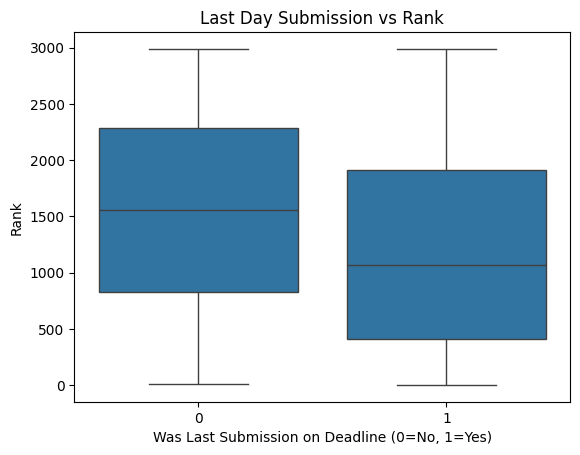

In [25]:
sns.boxplot(x='IsLastDaySubmission', y='Rank', data=df)
plt.title('Last Day Submission vs Rank')
plt.xlabel('Was Last Submission on Deadline (0=No, 1=Yes)')
plt.ylabel('Rank')
plt.show()

#### NOTE: no linear relationships apparent between any of the features and the target so far
- linear regression may not be a suitable model
- might need to rely on tree based models for better application of non-linear relationships

***

In [26]:
df.head(10)

,Rank,Score,SubmissionCount,SubmissionYear,SubmissionMonth,SubmissionDay,SubmissionHour,SubmissionWeekday,DaysSinceLastSubmission,IsLastDaySubmission
0,1,0.05537,103,2025,10,23,8,3,0,1
1,2,0.05537,65,2025,10,23,10,3,0,1
2,3,0.05538,19,2025,10,23,11,3,0,1
3,4,0.05538,51,2025,10,23,8,3,0,1
4,5,0.05538,60,2025,10,23,4,3,0,1
5,6,0.05538,49,2025,10,23,17,3,0,1
6,7,0.05538,40,2025,10,23,3,3,0,1
7,8,0.05538,78,2025,10,22,15,2,1,0
8,9,0.05538,50,2025,10,23,10,3,0,1
9,10,0.05538,39,2025,10,21,11,1,2,0


**Data Information**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2989 entries, 0 to 2989
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     2989 non-null   int64  
 1   Score                    2989 non-null   float64
 2   SubmissionCount          2989 non-null   int64  
 3   SubmissionYear           2989 non-null   int32  
 4   SubmissionMonth          2989 non-null   int32  
 5   SubmissionDay            2989 non-null   int32  
 6   SubmissionHour           2989 non-null   int32  
 7   SubmissionWeekday        2989 non-null   int32  
 8   DaysSinceLastSubmission  2989 non-null   int64  
 9   IsLastDaySubmission      2989 non-null   int64  
dtypes: float64(1), int32(5), int64(4)
memory usage: 198.5 KB


**Score Unique values**

In [28]:
df['Score'].nunique()

514

**Target(Score) and Features**

In [29]:
X = df.drop(columns=['Score'])
y = df['Score']

**Train/Test Split**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Pipeline Models (Linear Regression,Random Forest and SVM)**

***

<span style="color:red"> Testing baseline models with implementation of numerical and categorical pipelines</span>

In [31]:
#seperating numerical from categorical
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"numerical: {numeric_features}")
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print (f"categorical: {categorical_features}")

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

numerical: ['Rank', 'SubmissionCount', 'DaysSinceLastSubmission', 'IsLastDaySubmission']
categorical: []


<span style="color:red">Baseline Models</span>

In [32]:
def evaluate(model, X_train, y_train, X_test, y_test, name='model'):
    # Fit the model
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Basic metrics
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"{name}: MAE={mae:.3f}, RMSE={rmse:.3f}, R^2={r2:.3f}")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

linreg = Pipeline([('prep', preprocess), ('model', LinearRegression())])
rf = Pipeline([('prep', preprocess), ('model', RandomForestRegressor(random_state=42, n_estimators=300))])
svm = Pipeline([('prep', preprocess),('svm', SVR())])

scores = []
scores.append(evaluate(linreg, X_train, y_train, X_test, y_test, 'LinearRegression'))
scores.append(evaluate(rf, X_train, y_train, X_test, y_test, 'RandomForestRegressor'))
scores.append(evaluate(svm, X_train, y_train, X_test, y_test, 'SVM'))

results_df = pd.DataFrame(scores)
display(results_df)


LinearRegression: MAE=202.551, RMSE=4951.640, R^2=-0.002
RandomForestRegressor: MAE=202.449, RMSE=4950.563, R^2=-0.001
SVM: MAE=202.562, RMSE=4951.637, R^2=-0.002


,Model,MAE,RMSE,R2
0,LinearRegression,202.551106,4951.640490,-0.001673
1,RandomForestRegressor,202.449466,4950.563475,-0.001237
2,SVM,202.562409,4951.636770,-0.001671


***

In [33]:
pipelines = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ])

}

In [34]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None


**Cross-Validation (5 Folds)**


<span style="color:red">Trying implementation 1 of K-fold CV</span>

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, pipe in pipelines.items():
    cv_scores = cross_val_score(pipe, X, y, cv=kf, scoring='r2')
    print(f"{name} 5-Fold CV R² scores: {cv_scores}")
    print(f"{name} Mean CV R²: {cv_scores.mean():.3f}\n")

Linear Regression 5-Fold CV R² scores: [-1.67334631e-03 -1.25327817e+07 -6.86633727e+03 -5.70462141e+07
 -9.95933892e+06]
Linear Regression Mean CV R²: -15909040.205

Random Forest 5-Fold CV R² scores: [-1.23021581e-03  9.93826450e-01 -3.72779401e+06  9.99132759e-01
  9.97252058e-01]
Random Forest Mean CV R²: -745558.205

SVM 5-Fold CV R² scores: [-1.67242868e-03 -8.33247030e-01  6.95904955e-03 -8.35011889e+00
 -1.00698095e+00]
SVM Mean CV R²: -2.037



<span style="color:red">Trying implementation 2 of K-fold CV</span>

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Regression
linreg = Pipeline([
    ('prep', preprocess),
    ('model', LinearRegression())
])

# Random Forest
rf = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestRegressor(random_state=42, n_estimators=300))
])

# SVM
svm = Pipeline([
    ('prep', preprocess),
    ('model', SVR())
])


def cross_val_metrics(pipeline, X, y, cv):
    r2_scores, mae_scores, rmse_scores = [], [], []

    for train_idx, test_idx in cv.split(X):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train_fold, y_train_fold)
        preds = pipeline.predict(X_test_fold)

        r2_scores.append(r2_score(y_test_fold, preds))
        mae_scores.append(mean_absolute_error(y_test_fold, preds))
        rmse_scores.append(mean_squared_error(y_test_fold, preds))

    print(f"{pipeline.named_steps[list(pipeline.named_steps.keys())[-1]].__class__.__name__} CV Results:")
    print(f"  R²: Mean={np.mean(r2_scores):.3f}, Fold Scores={np.round(r2_scores,3)}")
    print(f"  MAE: Mean={np.mean(mae_scores):.3f}, Fold Scores={np.round(mae_scores,3)}")
    print(f"  RMSE: Mean={np.mean(rmse_scores):.3f}, Fold Scores={np.round(rmse_scores,3)}\n")

# Run CV for all three models
cross_val_metrics(linreg, X_train, y_train, kf)
cross_val_metrics(rf, X_train, y_train, kf)
cross_val_metrics(svm, X_train, y_train, kf)

LinearRegression CV Results:
  R²: Mean=-3.028, Fold Scores=[-6.224e+00 -7.973e+00  2.000e-03 -9.470e-01  4.000e-03]
  MAE: Mean=0.082, Fold Scores=[0.069 0.062 0.111 0.07  0.1  ]
  RMSE: Mean=0.821, Fold Scores=[0.007 0.006 2.95  0.009 1.135]

RandomForestRegressor CV Results:
  R²: Mean=0.392, Fold Scores=[ 0.999  0.999  0.667 -1.537  0.834]
  MAE: Mean=0.016, Fold Scores=[0.    0.    0.046 0.007 0.029]
  RMSE: Mean=0.237, Fold Scores=[0.    0.    0.984 0.011 0.189]

SVR CV Results:
  R²: Mean=-2.466, Fold Scores=[-4.355e+00 -7.446e+00  7.000e-03 -5.470e-01  1.300e-02]
  MAE: Mean=0.091, Fold Scores=[0.065 0.067 0.142 0.065 0.116]
  RMSE: Mean=0.815, Fold Scores=[0.005 0.005 2.934 0.007 1.125]



**Training the models**

In [37]:
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.


**Evaluating the Models**

In [38]:
results = {}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred)**0.5
    }

results_df = pd.DataFrame(results).T
print(results_df)

                         R2         MAE         RMSE
Linear Regression -0.001673  202.553361  4951.641383
Random Forest     -0.001218  202.443294  4950.514853
SVM               -0.001672  202.549442  4951.639108


**Ranking the models by R² (higher is better)**

In [39]:
results_df['Rank'] = results_df['R2'].rank(ascending=False, method='min')
results_df = results_df.sort_values('Rank')
print(results_df)

                         R2         MAE         RMSE  Rank
Random Forest     -0.001218  202.443294  4950.514853   1.0
SVM               -0.001672  202.549442  4951.639108   2.0
Linear Regression -0.001673  202.553361  4951.641383   3.0


**Best-performing model: Random Forest**

**Worst-performing model: Linear Regression**

**Middle: SVM**

**Hyperparameter Tuning**

In [40]:
# Ridge regressor
ridge = Ridge()

# Hyperparameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}

# GridSearch with 5-fold CV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Results
print("Best params:", grid_search.best_params_)
print("Best CV R2: %.3f" % grid_search.best_score_)

# Best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test R² after tuning:", r2_score(y_test, y_pred_best))

Best params: {'alpha': 100, 'fit_intercept': False}
Best CV R2: -11148109844063.596
Test R² after tuning: 0.003050577589783554


In [41]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

In [42]:
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False]
}


In [43]:
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,"Pipeline(step...l', Ridge())])"
,param_grid,"{'model__alpha': [0.01, 0.1, ...], 'model__fit_intercept': [True, False]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [ ]:
print("Best params:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)

# best model
best_ridge = grid_search.best_estimator_

# test set
y_pred = best_ridge.predict(X_test)


Best params: {'model__alpha': 100, 'model__fit_intercept': True}
Best CV R2: -3.311937503830664


In [44]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R2: {r2:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")

Test R2: -0.002
Test MAE: 202.549
Test RMSE: 4951.639


**Conclusion**

The evaluation of Random Forest, SVM, Linear Regression, and Ridge Regression showed that all models had limited predictive power, with R² values near zero and relatively high MAE and RMSE. Ridge Regression was applied with hyperparameter tuning, testing alpha values from 0.01 to 100 and fit_intercept options. The best configuration was alpha = 100 with fit_intercept set to True, yet the performance remained similar to Linear Regression, with a test R² of -0.002.

Among all models, Random Forest performed slightly better, achieving the highest R² and lowest errors. This indicates that nonlinear methods may better capture the patterns in the data. Further improvements could come from feature engineering, advanced modeling, or refined preprocessing.

For this project, the following workflow and steps were applied:

1. Machine learning workflow
2. Data preprocessing
3. Feature engineering
4. Data exploration
5. Model building
6. Cross-validation
7. Hyperparameter tuning
8. Model comparison
9. Evaluation using MAE, RMSE, and R²


